# Домашнее задание №2. Дескриптивный анализ данных

**Цель работы**: приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python

## Вариант

In [2]:
surname = "Каракешишян"

if not surname:
    raise Exception('Необходимо указать фамилию!')

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
VARIANT =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1 - вариант: ", VARIANT % 5 + 1)
print("задача № 2 - вариант: ", VARIANT % 4 + 1)

Задача № 1 - вариант:  3
задача № 2 - вариант:  4


## Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI)

В качестве индикатора далее необходимо использовать контроль над коррупцией (Control of Corruption) и его показатели `rank` и `estimate`

- Набор данных:
    - [WGI](data/wgidataset.xlsx)
    - [Регионы](data/regions.xlsx)
- [Описание WGI](http://info.worldbank.org/governance/wgi/)

1. Загрузите данные в DataFrame и сохраните в `DF_WGI`

In [24]:
#Используемые библиотеки в задании 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
WGI = "data/wgidataset.xlsx"
#Чтение эксель файла, пропуская первые 13 строк, создавая заголовок и подзаголовок
DF_WGI = pd.read_excel(WGI, skiprows = 13, sheet_name = "ControlofCorruption", header = [0, 1])
DF_WGI


Basic           1996                                         \
    Country/Territory Code  Estimate    StdErr NumSrc       Rank      Lower   
0               Aruba  ABW       NaN       NaN    NaN        NaN        NaN   
1             Andorra  ADO  1.318143  0.480889    1.0  87.096771  72.043015   
2         Afghanistan  AFG -1.291705  0.340507    2.0   4.301075   0.000000   
3              Angola  AGO -1.167702  0.262077    4.0   9.677420   0.537634   
4            Anguilla  AIA       NaN       NaN    NaN        NaN        NaN   
..                ...  ...       ...       ...    ...        ...        ...   
209            Serbia  SRB -1.140072  0.262077    4.0  11.827957   0.537634   
210      South Africa  ZAF  0.732927  0.210325    6.0  76.344086  66.129036   
211  Congo, Dem. Rep.  ZAR -1.647852  0.315914    3.0   0.000000   0.000000   
212            Zambia  ZMB -0.840641  0.262077    4.0  24.731182   5.913979   
213          Zimbabwe  ZWE -0.278847  0.244907    5.0  47.849461  30.645161   

                    1998            ...   2021                        \
         Upper  Estimate    StdErr  ... NumSrc       Rank      Lower   
0          NaN       NaN       NaN  ...    2.0  78.571426  62.857143   
1    96.774193  1.334759  0.453149  ...    1.0  88.571426  70.000000   
2    27.419355 -1.176012  0.324013  ...    8.0  12.380953   4.761905   
3    27.419355 -1.180451  0.227055  ...   10.0  29.047619  19.523809   
4          NaN       NaN       NaN  ...    1.0  73.333336  50.952381   
..         ...       ...       ...  ...    ...        ...        ...   
209  29.032259 -1.195605  0.191027  ...    9.0  35.714287  26.190475   
210  81.182793  0.638809  0.188628  ...   11.0  53.809525  46.190475   
211  12.365591 -1.416679  0.310343  ...   11.0   4.285714   0.000000   
212  41.397850 -0.853156  0.227055  ...   12.0  25.714285  17.619047   
213  60.752689 -0.504802  0.198134  ...   12.0  10.000000   4.285714   

                    2022                                                    
         Upper  Estimate    StdErr NumSrc       Rank      Lower      Upper  
0    89.047623  0.756785  0.317250    2.0  77.830185  60.849056  88.679245  
1    96.666664  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
2    20.952381 -1.183776  0.173320    8.0  12.264151   4.716981  20.283018  
3    40.476189 -0.601941  0.160003   10.0  30.660378  21.226416  43.396225  
4    89.047623  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
..         ...       ...       ...    ...        ...        ...        ...  
209  48.095238 -0.456188  0.158030    9.0  35.377357  24.528301  48.113209  
210  60.000000 -0.319765  0.157883   11.0  44.811321  31.603773  52.358490  
211   6.666667 -1.544474  0.149016   12.0   3.301887   0.471698   7.075472  
212  33.809525 -0.529200  0.152557   12.0  34.433964  23.584906  45.754719  
213  17.619047 -1.255139  0.151262   12.0   8.490566   4.245283  17.924528  

[214 rows x 146 columns]

2. Отсортируйте данные по убыванию индекса DataFrame и сохраните в `DF_SORTED`

In [5]:
#Сортировка по убыванию индексов :/
DF_SORTED = DF_WGI.sort_index(ascending=False)
DF_SORTED

Basic           1996                                         \
    Country/Territory Code  Estimate    StdErr NumSrc       Rank      Lower   
213          Zimbabwe  ZWE -0.278847  0.244907    5.0  47.849461  30.645161   
212            Zambia  ZMB -0.840641  0.262077    4.0  24.731182   5.913979   
211  Congo, Dem. Rep.  ZAR -1.647852  0.315914    3.0   0.000000   0.000000   
210      South Africa  ZAF  0.732927  0.210325    6.0  76.344086  66.129036   
209            Serbia  SRB -1.140072  0.262077    4.0  11.827957   0.537634   
..                ...  ...       ...       ...    ...        ...        ...   
4            Anguilla  AIA       NaN       NaN    NaN        NaN        NaN   
3              Angola  AGO -1.167702  0.262077    4.0   9.677420   0.537634   
2         Afghanistan  AFG -1.291705  0.340507    2.0   4.301075   0.000000   
1             Andorra  ADO  1.318143  0.480889    1.0  87.096771  72.043015   
0               Aruba  ABW       NaN       NaN    NaN        NaN        NaN   

                    1998            ...   2021                        \
         Upper  Estimate    StdErr  ... NumSrc       Rank      Lower   
213  60.752689 -0.504802  0.198134  ...   12.0  10.000000   4.285714   
212  41.397850 -0.853156  0.227055  ...   12.0  25.714285  17.619047   
211  12.365591 -1.416679  0.310343  ...   11.0   4.285714   0.000000   
210  81.182793  0.638809  0.188628  ...   11.0  53.809525  46.190475   
209  29.032259 -1.195605  0.191027  ...    9.0  35.714287  26.190475   
..         ...       ...       ...  ...    ...        ...        ...   
4          NaN       NaN       NaN  ...    1.0  73.333336  50.952381   
3    27.419355 -1.180451  0.227055  ...   10.0  29.047619  19.523809   
2    27.419355 -1.176012  0.324013  ...    8.0  12.380953   4.761905   
1    96.774193  1.334759  0.453149  ...    1.0  88.571426  70.000000   
0          NaN       NaN       NaN  ...    2.0  78.571426  62.857143   

                    2022                                                    
         Upper  Estimate    StdErr NumSrc       Rank      Lower      Upper  
213  17.619047 -1.255139  0.151262   12.0   8.490566   4.245283  17.924528  
212  33.809525 -0.529200  0.152557   12.0  34.433964  23.584906  45.754719  
211   6.666667 -1.544474  0.149016   12.0   3.301887   0.471698   7.075472  
210  60.000000 -0.319765  0.157883   11.0  44.811321  31.603773  52.358490  
209  48.095238 -0.456188  0.158030    9.0  35.377357  24.528301  48.113209  
..         ...       ...       ...    ...        ...        ...        ...  
4    89.047623  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
3    40.476189 -0.601941  0.160003   10.0  30.660378  21.226416  43.396225  
2    20.952381 -1.183776  0.173320    8.0  12.264151   4.716981  20.283018  
1    96.666664  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
0    89.047623  0.756785  0.317250    2.0  77.830185  60.849056  88.679245  

[214 rows x 146 columns]

3. Отобразите данные по индексу WGI за 2022 год в виде горизонтального столбчатого графика (`rank`). Примерный вид графика приведен ниже

![](img/cpi_2016_.png)

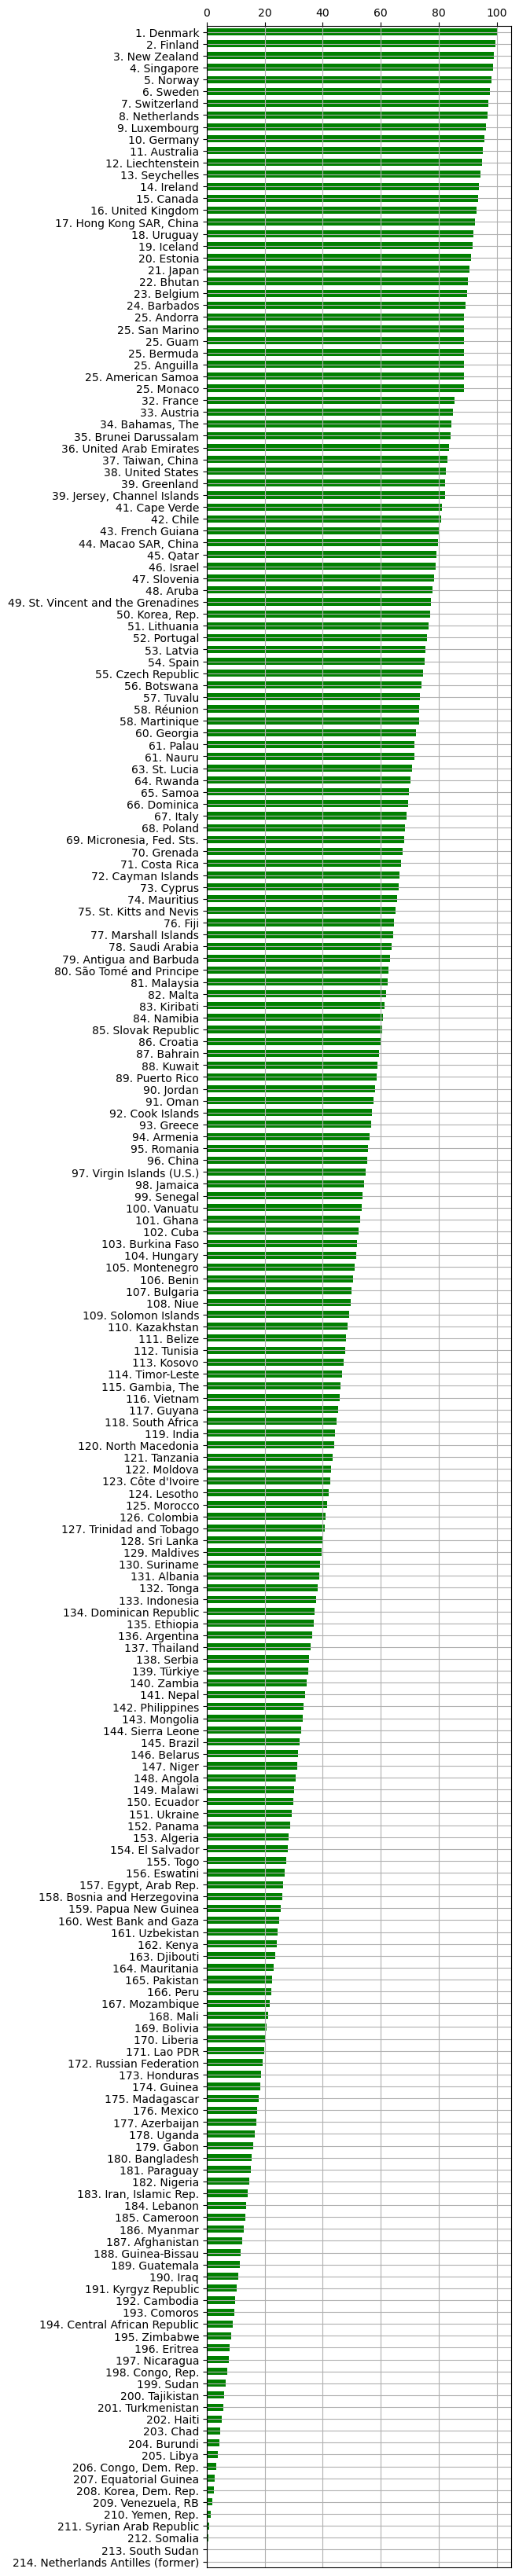

In [6]:
#Сортировка в обратном порядке (от большего к меньшему) ранги за 2022 год, пересоздаю индексы
DF_WGI_SORTED = DF_WGI.sort_values(by=(2022, 'Rank'), ascending=False).reset_index(drop=True)

offset = DF_WGI_SORTED.index                                    #Значения по оси Ох
heights = DF_WGI_SORTED.loc[:, (2022, 'Rank')]                  #Значения по оси Оу
names = DF_WGI_SORTED.loc[:, ('Basic', 'Country/Territory')]    #Названия стран

#Условие номирования стран
ranked_names = []
current_rank = 1
counter = 0
for i in range(len(heights)):
    #Увеличивается значение counter, присваивается current_rank, тем самым можно сохранить ранг. Если значения одинаковые,
    #то текущий ранг сохраняется и обновляется уже после того, как закончились страны с одинаковыми значениями рангов
    if i > 0 and heights[i] == heights[i - 1]:                  #Если страны имеют одинаковые ранги
        ranked_names.append(f"{current_rank}. {names[i]}")
        #current_rank остается неизменным, при этом происходит подсчет стран через counter
        counter += 1
    else:
        counter += 1
        current_rank = counter
        ranked_names.append(f"{current_rank}. {names[i]}")

plt.figure("100", figsize=(5, 42))                              #Создание окна графика
plt.gca().xaxis.set_ticks_position('top')                       #Перемещаем ось Ох на верх
ax = plt.subplot(1,1,1)                                         #В графике 1 подграфик

#Создаем горизонтальную столбчатую гистограмму
plt.barh(offset, heights, color = 'green', height=0.6)
ax.set_yticks(offset)                                           #Значения по оси Оу
ax.set_yticklabels(ranked_names)                                #Названия этих значений по оси Оу

#Удаляем лишний интервал между первым значением и границей графика
ax.set_ylim(-0.5, len(offset) - 0.5)
ax.invert_yaxis()                                               #Разворачиваем ось Оу

#Показываем график
plt.grid(True)
plt.show()

На графике видно, что наибольший ранг имеют страны западной европы, а наименьший ранг у стран африки

4. Сформируйте DataFrame из исходного для региона в соответствии с Вашим вариантом и сохраните в `DF_REGION`
    - Вариант 3. Europe and Central Asia

In [7]:
REGION = "data/regions.xlsx"                                    
DF_REGION = pd.read_excel(REGION)
DF_REGION = DF_REGION.loc[DF_REGION['Region'] == 'ECA']         #Страны европы и центральной азии


5. Выведите данные DataFrame'a

In [8]:
#Вывод DataFrame'а
DF_REGION

,Country,Code,Region
1,Albania,ALB,ECA
5,Armenia,ARM,ECA
8,Azerbaijan,AZE,ECA
13,Belarus,BLR,ECA
18,Bosnia and Herzegovina,BIH,ECA
59,Georgia,GEO,ECA
83,Kazakhstan,KAZ,ECA
87,Kosovo,KSV,ECA
89,Kyrgyzstan,KGZ,ECA
107,Moldova,MDA,ECA


6. Постройте графики индекса WGI за 1996-2022 для стран своего региона (`estimate`). Примерный вид графика приведен ниже

  ![](img/fig_springfield_region.png)

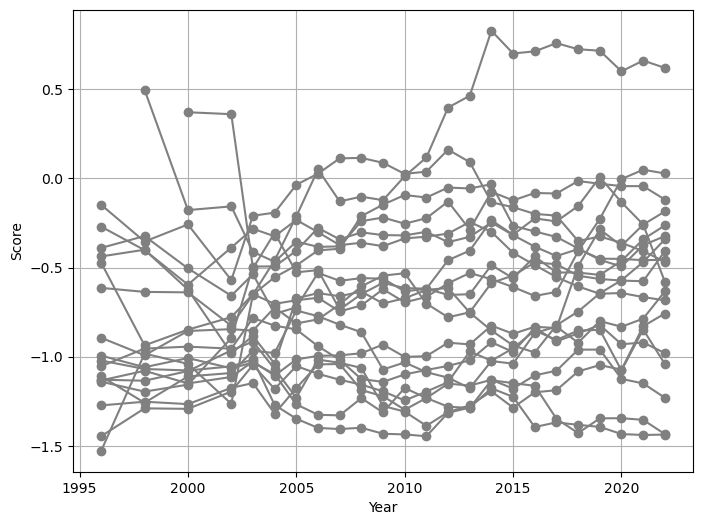

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

#Выбираются уникальные года (заголовки первого уровня) 
years = DF_WGI.columns.get_level_values(0)[2:].unique()

filtered_data = DF_WGI.loc[DF_WGI[('Basic', 'Code')].isin(DF_REGION['Code'])]   #Отбор стран из DF_WGI с таким же кодом, как 
                                                                                #в DF_REGION

#Выбираем только те столбцы, у которых на втором уровне индекса значение 'Estimate'
estimate = filtered_data.loc[:, filtered_data.columns.get_level_values(1) == 'Estimate']

#Построение графика для всех строк в estimate
for year, row in estimate.iterrows():
    ax.plot(years, row, marker="o",  color='gray')                              #Для каждой строки добавляем свою линию

ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Score')
plt.show()


На графике видно, что страны региона ЕСА в основном имеют ранг меньше нуля. Только две страны на момент 2022 года имели ранг выше нуля.

7. Найдите страны с наибольшим и наименьшим значением WGI Вашего варианта региона за 2022 год (`estimate`). Запишите эти страны в один DataFrame `DF_MINMAX` с соответствующими отметками

In [10]:
#Из dataframe'а DF_WGI выбираю страны своего региона, затем смотрю Estimate за 2022 год по этим странам
estimate = DF_WGI.loc[DF_WGI[('Basic', 'Code')].isin(DF_REGION['Code'])].loc[:, (2022, 'Estimate')]
#Выбирются страны с максимальной и минимальной оценкой 
country_max_estimate = DF_WGI.loc[estimate.idxmax(), ('Basic', 'Country/Territory')]
country_min_estimate = DF_WGI.loc[estimate.idxmin(), ('Basic', 'Country/Territory')]

DF_MINMAX = pd.DataFrame({
    'Country/Territory': [country_min_estimate, country_max_estimate],
    'Min/Max Estimate': ['min', 'max']},
    index=[estimate.idxmin(), estimate.idxmax()])
DF_MINMAX

,Country/Territory,Min/Max Estimate
187,Turkmenistan,min
69,Georgia,max


8. Определите средние значения региона за каждый год в период с 1996 по 2022 (`estimate`) и сохраните их в Series `S_MEANS` только из средних значений для каждого года

In [11]:
filtered_data = DF_WGI.loc[DF_WGI[('Basic', 'Code')].isin(DF_REGION['Code'])]
estimate = filtered_data.loc[:, filtered_data.columns.get_level_values(1) == 'Estimate']
S_MEANS = pd.Series(data=estimate.mean(), name="mean_estimate")
S_MEANS


1996  Estimate   -0.885471
1998  Estimate   -0.823362
2000  Estimate   -0.802862
2002  Estimate   -0.821879
2003  Estimate   -0.740051
2004  Estimate   -0.782648
2005  Estimate   -0.727624
2006  Estimate   -0.685522
2007  Estimate   -0.721019
2008  Estimate   -0.698221
2009  Estimate   -0.720827
2010  Estimate   -0.721366
2011  Estimate   -0.719957
2012  Estimate   -0.666920
2013  Estimate   -0.660700
2014  Estimate   -0.584655
2015  Estimate   -0.643372
2016  Estimate   -0.618599
2017  Estimate   -0.633326
2018  Estimate   -0.600420
2019  Estimate   -0.561316
2020  Estimate   -0.596217
2021  Estimate   -0.551040
2022  Estimate   -0.562725
Name: mean_estimate, dtype: float64

9. Постройте графики индекса WGI за 1996-2022 для стран своего региона и выделите страны с наибольшим и наименьшим значением WGI за 2022 год, а также отобразите среднее значение по региону и РФ. Примерный вид графика приведен ниже

![](img/fig_springfield_region_comb.png)

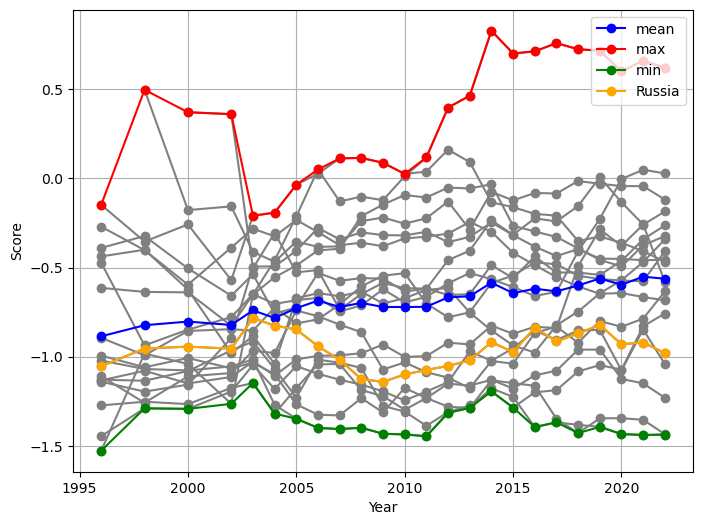

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

#Выбираются уникальные года (заголовки первого уровня) 
years = DF_WGI.columns.get_level_values(0)[2:].unique()

filtered_data = DF_WGI.loc[DF_WGI[('Basic', 'Code')].isin(DF_REGION['Code'])]
estimate = filtered_data.loc[:, filtered_data.columns.get_level_values(1) == 'Estimate']

S_MIN = pd.DataFrame(estimate.min())
S_MAX = pd.DataFrame(estimate.max())
S_MEANS_ = pd.DataFrame(estimate.mean())

S_MIN = S_MIN.T
S_MAX = S_MAX.T
S_MEANS_ = S_MEANS_.T

#Из dataframe'а DF_WGI отбираю Россию
filtered_data_rus = DF_WGI.loc[DF_WGI[('Basic', 'Code')] == 'RUS']
estimate_rus = filtered_data_rus.loc[:, filtered_data_rus.columns.get_level_values(1) == 'Estimate']

S_RUS = estimate_rus
#Построение графика для всех строк в estimate
for year, row in estimate.iterrows():
    ax.plot(years, row, marker="o",  color='gray')
for year, row in S_MEANS_.iterrows():
    ax.plot(years, row, marker="o",  color='blue', label = 'mean')
for year, row in S_MAX.iterrows():
    ax.plot(years, row, marker="o",  color='red', label = 'max')
for year, row in S_MIN.iterrows():
    ax.plot(years, row, marker="o",  color='green', label = 'min')
for year, row in S_RUS.iterrows():
    ax.plot(years, row, marker="o",  color='orange', label = 'Russia')

ax.legend(loc='upper right')
ax.grid(True)
ax.set_xlabel('Year')
ax.set_ylabel('Score')
plt.show()


В среднем в регионе ЕСА ранг увеличился, также как и минимальное/максимальное значение ранга. К сожалению, изменение ранга России почти нет, если смотреть значения за 2022 и 1996 года

10. Определите, как изменилось значение показателя `rank` с 1996 по 2022 (`rank`) ($2022 - 1996$)

In [13]:
rank_2022 = DF_WGI.loc[:, (2022, 'Rank')]
rank_1996 = DF_WGI.loc[:, (1996, 'Rank')]
rank_2022-rank_1996

0            NaN
1       1.582474
2       7.963075
3      20.982958
4            NaN
         ...    
209    23.549400
210   -31.532764
211     3.301887
212     9.702782
213   -39.358894
Length: 214, dtype: float64

11. Выведите таблицу для ***Вашего варианта*** (WGI - `rank`) и сохраните в таблицу `RES_TABLE`

|             | Region | Country | Rank 1996 | Rank 2022 | Difference |
| ----------- | ------ | ------- | --------- | --------- | ---------- |
| mean_2022   | -      | -       | -         | -         | -          |
| max_2022    | -      | -       | -         | -         | -          |
| min_2022    | -      | -       | -         | -         | -          |
| Russia_2022 | -      | -       | -         | -         | -          |


In [25]:
rank_1996 = filtered_data.loc[:, (1996, 'Rank')]
rank_2022 = filtered_data.loc[:, (2022, 'Rank')]

#-------Country ECA region-------#

#Difference mean_2022
dif_rank_mean = rank_2022.mean() - rank_1996.mean()

#Country min/max_2022
country_max = filtered_data.loc[filtered_data[(2022, 'Rank')].isin([max(rank_2022)]), ('Basic', 'Country/Territory')]
country_min = filtered_data.loc[filtered_data[(2022, 'Rank')].isin([min(rank_2022)]), ('Basic', 'Country/Territory')]

#Rank1996
rank_1996_min_max_2022 = filtered_data.loc[filtered_data[('Basic', 'Country/Territory')].isin([country_max.iloc[0]]), (1996, 'Rank')]
rank_1996_min_min_2022 = filtered_data.loc[filtered_data[('Basic', 'Country/Territory')].isin([country_min.iloc[0]]), (1996, 'Rank')]

#Difference min/max_2022
dif_rank_max = max(rank_2022) - rank_1996_min_max_2022.iloc[0]
dif_rank_min = min(rank_2022) - rank_1996_min_min_2022.iloc[0]

#-------Russia-------#
rank_1996_rus = filtered_data_rus.loc[:, (1996, 'Rank')]
rank_2022_rus = filtered_data_rus.loc[:, (2022, 'Rank')]

#Difference Russia_2022
dif_rank_rus = rank_2022_rus.iloc[0] - rank_1996_rus.iloc[0]

#Country Russia_2022
country_rus = filtered_data_rus.loc[:, ('Basic', 'Country/Territory')]

region = DF_REGION.loc[DF_REGION['Region'] == 'ECA', 'Region']

#Dataframe
RES_TABLE = pd.DataFrame({
    'Region': [region.iloc[0], region.iloc[0], region.iloc[0], region.iloc[0]],
    'Country': ['-', country_max.iloc[0], country_min.iloc[0], country_rus.iloc[0]],
    'Rank 1996': [rank_1996.mean(), rank_1996_min_max_2022.iloc[0], rank_1996_min_min_2022.iloc[0], rank_1996_rus.iloc[0]],
    'Rank 2022': [rank_2022.mean(), max(rank_2022), min(rank_2022), rank_2022_rus.iloc[0]],
    'Difference': [dif_rank_mean, dif_rank_max, dif_rank_min, dif_rank_rus]
}, index = ['mean_2022', 'max_2022', 'min_2022', 'Russia_2022'])
RES_TABLE

,Region,Country,Rank 1996,Rank 2022,Difference
mean_2022,ECA,-,22.390892,33.714002,11.323110
max_2022,ECA,Georgia,1.075269,72.169815,71.094546
min_2022,ECA,Turkmenistan,15.591398,5.660378,-9.931021
Russia_2022,ECA,Russian Federation,15.053763,19.339622,4.285859


12. Отобразите диаграмму размаха (`boxplot`) индекса WGI за 2022 для всех стран и для каждого региона в отдельности (на одном графике) (`estimate`)

C:\Users\dima2\AppData\Local\Temp\ipykernel_600\986226608.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Region', y='Estimate', palette='husl')


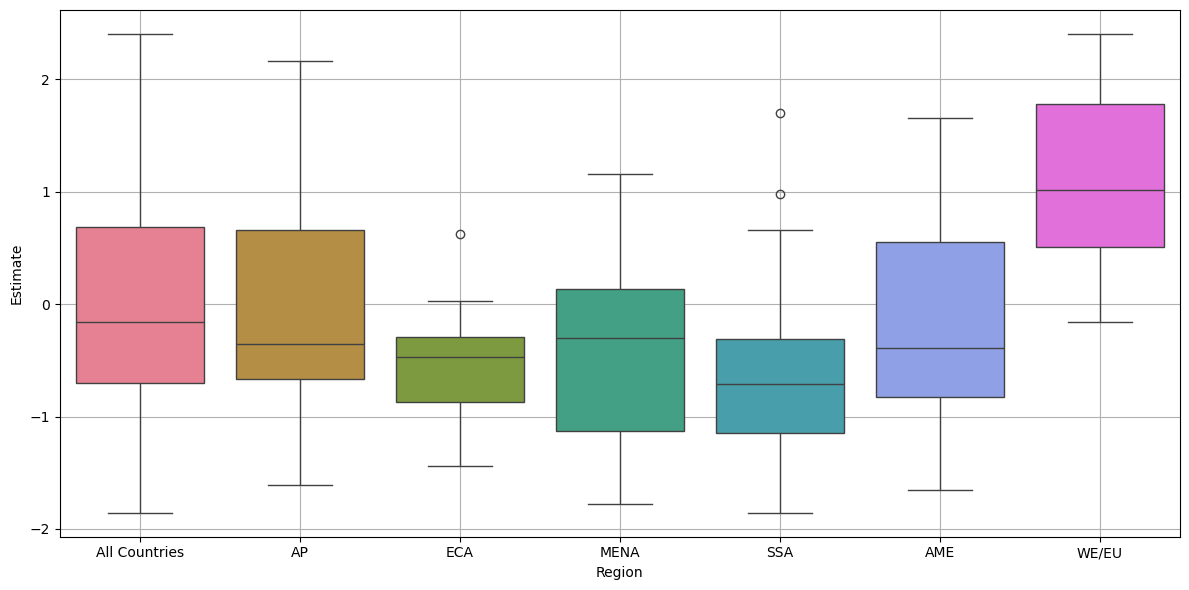

In [15]:
DF_REGIONS = pd.read_excel(REGION)

#Получение списка регионов и группировка данных
list_regions = DF_REGIONS['Region'].unique()
groupby = DF_REGIONS.groupby('Region')

#Создание общего DataFrame для всех данных
data = []

#Добавление всех стран
all_countries = DF_WGI.loc[:, (2022, 'Estimate')]
data.append(pd.DataFrame({
    'Region': ['All Countries'] * len(all_countries),
    'Estimate': all_countries.values
}))

#Добавление данных по регионам
for region in list_regions:
    df = groupby.get_group(region)
    filtered_regions = DF_WGI.loc[DF_WGI[('Basic', 'Code')].isin(df['Code']), (2022, 'Estimate')].dropna()
    data.append(pd.DataFrame({
        'Region': [region] * len(filtered_regions),
        'Estimate': filtered_regions.values
    }))

#Объединяем все данные
combined_data = pd.concat(data, ignore_index=True)

#Построение boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Region', y='Estimate', palette='husl')
plt.xticks()
plt.grid(True)
plt.tight_layout()
plt.show()


1. Если рассматривать все страны мира, то видно, что все страны принимают значения от ~-1.8 до ~2.3, большая часть стран принимают значения в интервале (-1;1), но в среднем значение оценки всех стран меньше нуля
2. У стран региона АР примерно такой же результат, как у всех стран мира, но в среднем значение оценки еще меньше нуля
3. У стран региона ЕСА почти нет стран с полоджительной оценкой, есть 1 выброс
4. У стран региона МЕNА значение оценки в основном меньше нуля, в среднем аналогично меньше нуля, но при этом выше, чем у стран региона ЕСА
5. У стран региона SSА самые низкие результаты оценки,имеются два выброса
6. У стран региона АМЕ примерно такие же результаты, что и у стран региона АР
7. У стран региона WE/EU самые высокие результаты оценки, в среднем их оценка приблизительно равна 1.

## Задача 2. Анализ рынка акций

1. Загрузите данные в один dataframe из всех файлов в папке /data/stock. Все файлы имеют одинаковую структуру, в том числе наименование столбцов. В качестве значений индекса dataframe'а необходимо указать значения столбца "Date". Название столбцов должные соответствовать названию акций (имя файла без .csv), а их значения - значениям цены закрытия (столбец "Close" в файлах .csv). Сохраните DataFrame в `DF_COMPANIES`

In [16]:
#Используемые библиотеки в задании 2 
import os

In [17]:
STOCK = 'data/stock'

#Запись из файла stock всех файлов формата csv
files = [f for f in os.listdir(STOCK) if f.endswith('.csv')]

data = []

for file in files:
    file_path = os.path.join(STOCK, file)               #Указываем путь к файлу
    df = pd.read_csv(file_path, index_col='Date')
    company_name = file.split('.')[0]                   #Переименовываем столбец 'Close' на название файла без расширения
    df = df.rename(columns={'Close': company_name})
    data.append(df[company_name])                       #Добавляем только нужный столбец в список

DF_COMPANIES = pd.DataFrame(data).T
DF_COMPANIES = DF_COMPANIES.sort_index(axis=1)
DF_COMPANIES

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,174.779999,153.970001,534.299988,149.573502,55.669998,24.750000,60.070000,135.303497,64.010002,36.730000,...,244.860001,81.160004,29.559999,NaN,196.259995,26.610001,312.239990,206.119995,37.400002,10.7350
2022-02-01,165.119995,151.490005,467.679993,153.563004,55.770000,22.690001,54.590000,135.057007,58.270000,34.360001,...,243.850006,75.970001,26.750000,NaN,156.190002,25.820000,290.143341,174.800003,36.029999,9.5500
2022-03-01,174.610001,171.759995,455.619995,162.997498,55.759998,23.250000,57.259998,139.067505,54.450001,36.299999,...,272.859985,82.730003,24.610001,NaN,151.020004,23.120001,359.200012,164.809998,35.680000,8.7199
2022-04-01,157.649994,153.210007,395.950012,124.281502,48.980000,21.750000,51.919998,114.109497,47.930000,36.630001,...,185.470001,73.400002,20.520000,NaN,101.650002,23.650000,290.253326,111.820000,31.480000,7.5400
2022-05-01,148.839996,120.870003,416.480011,120.209503,45.049999,20.840000,48.669998,113.762001,38.939999,38.840000,...,186.720001,71.919998,19.650000,NaN,112.769997,22.059999,252.753326,105.169998,23.200001,7.6300
2022-06-01,136.720001,89.080002,366.059998,106.209999,42.639999,20.990000,41.669998,108.962997,53.139999,32.779999,...,151.589996,69.870003,18.160000,NaN,93.830002,27.450001,224.473328,83.809998,20.459999,8.6300
2022-07-01,162.509995,110.980003,410.119995,134.949997,45.369999,22.740000,48.630001,116.320000,57.400002,33.389999,...,181.630005,77.839996,19.480000,NaN,113.019997,25.780001,297.149994,84.800003,23.450001,7.8900
2022-08-01,157.220001,113.120003,373.440002,126.769997,44.720001,21.389999,44.130001,108.220001,59.869999,28.709999,...,150.940002,74.150002,23.040001,NaN,108.150002,25.719999,275.609985,69.580002,28.760000,7.1900
2022-09-01,138.199997,105.040001,275.200012,113.000000,40.000000,20.719999,36.810001,95.650002,51.220001,24.920000,...,121.389999,61.070000,23.299999,NaN,86.300003,27.309999,265.250000,69.139999,26.500000,5.5800


2. Рассчитайте корреляционную матрицу для всех акций и сохраните её в `DF_CORR`

In [18]:
DF_CORR = DF_COMPANIES.corr()
DF_CORR

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
AAPL,1.000000,0.617430,0.833129,0.665715,0.589552,0.740429,0.115591,0.806847,0.282373,0.067074,...,0.633114,0.769309,0.640294,0.465147,0.687415,0.439363,0.248385,0.042914,0.661323,0.408747
ABNB,0.617430,1.000000,0.670509,0.830690,0.594365,0.332740,0.644140,0.780440,0.460602,0.390153,...,0.649664,0.471504,0.554616,0.696599,0.753797,0.294269,0.353807,0.429915,0.680764,0.564475
ADBE,0.833129,0.670509,1.000000,0.819614,0.554172,0.816359,0.180354,0.915440,0.496556,0.081518,...,0.802739,0.785432,0.804657,0.783919,0.863827,0.533298,0.071508,0.067604,0.834611,0.697612
AMZN,0.665715,0.830690,0.819614,1.000000,0.404820,0.478171,0.434078,0.912332,0.690644,0.235247,...,0.765294,0.534556,0.666996,0.824934,0.875779,0.309545,0.302321,0.314869,0.796897,0.654564
CSCO,0.589552,0.594365,0.554172,0.404820,1.000000,0.496982,0.494938,0.600025,0.068856,0.214262,...,0.320159,0.463955,0.384233,-0.144612,0.424007,0.257188,0.253808,0.383777,0.326346,0.474311
DBX,0.740429,0.332740,0.816359,0.478171,0.496982,1.000000,-0.157363,0.669228,0.402517,-0.177013,...,0.519374,0.667833,0.710191,0.424923,0.525305,0.423136,0.037233,-0.113102,0.595928,0.382992
EBAY,0.115591,0.644140,0.180354,0.434078,0.494938,-0.157363,1.000000,0.375794,0.251066,0.744560,...,0.087027,-0.070414,-0.002757,0.338672,0.296858,-0.149330,0.434899,0.753732,0.085736,0.535223
GOOGL,0.806847,0.780440,0.915440,0.912332,0.600025,0.669228,0.375794,1.000000,0.535473,0.263251,...,0.715287,0.618983,0.640675,0.824313,0.821587,0.322718,0.326662,0.315410,0.737311,0.680658
GTLB,0.282373,0.460602,0.496556,0.690644,0.068856,0.402517,0.251066,0.535473,1.000000,0.094128,...,0.404702,0.138574,0.525458,0.855342,0.540113,0.103614,0.260908,0.310273,0.521399,0.453669
HPQ,0.067074,0.390153,0.081518,0.235247,0.214262,-0.177013,0.744560,0.263251,0.094128,1.000000,...,-0.160502,-0.260316,-0.285950,0.436406,0.005774,-0.443806,0.568231,0.728572,-0.180970,0.378627


3. Отобразите корреляционную матрицу в виде диаграммы. Примерный вид графика приведен ниже

  ![](img/fig_corr_matrix.png)

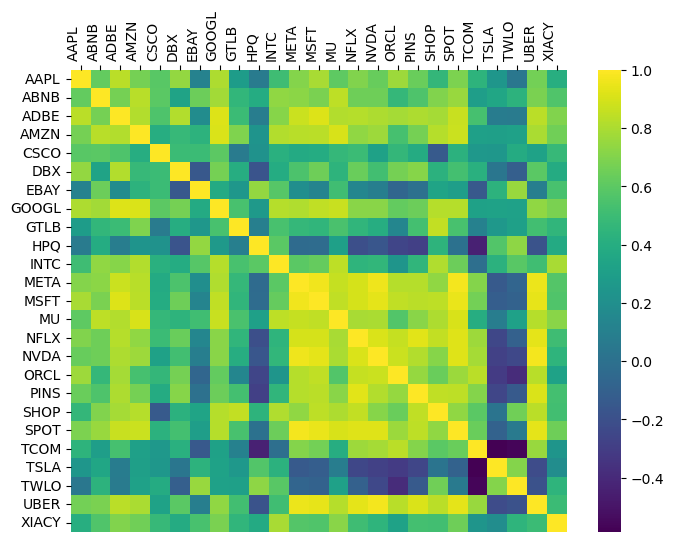

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(DF_CORR, cmap='viridis')

#Получаем текущие оси
ax = plt.gca()

#Размещаем ось X сверху
ax.xaxis.set_ticks_position('top')

#Устанавливаем метки для осей X и Y одинаковыми
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_yticklabels(ax.get_yticklabels())

#Показать график
plt.show()

4. В соответствии с Вашим вариантом определите:

    - акцию с максимальной положительной корреляцией (max)
    - акцию с максимальной отрицательной корреляцией (min)
    - акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none))

    Варианты
    - **Вариант 4.** Uber (UBER)

  Сохраните результаты в списке `LST_COMP_CORR` в указанном порядке

In [20]:
stock_max = DF_CORR['UBER'].drop('UBER').idxmax()
stock_min = DF_CORR['UBER'].idxmin()
stock_none = DF_CORR['UBER'].abs().idxmin()
LST_COMP_CORR = [stock_max, stock_min, stock_none]
LST_COMP_CORR

['NVDA', 'TSLA', 'EBAY']

5. Постройте диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none). По `x` расположите цену вашей компании, по `y` - цену компании в паре

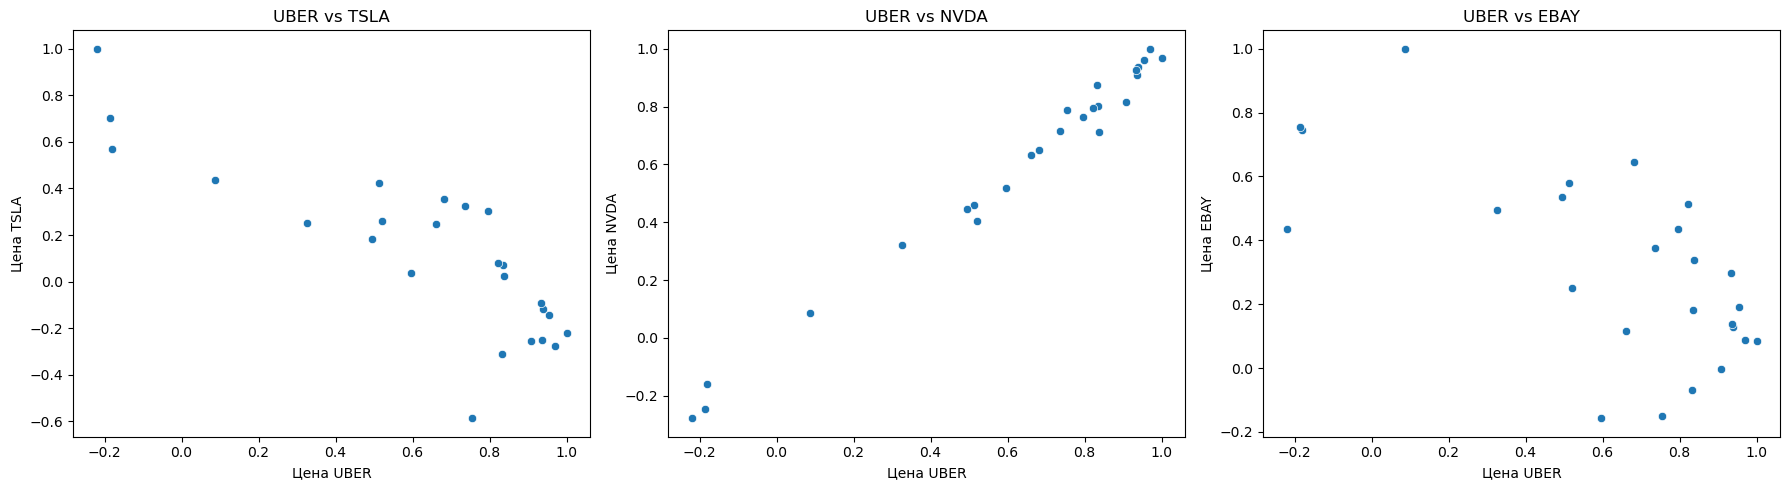

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#(UBER vs stock_min)
sns.scatterplot(x=DF_CORR['UBER'], y=DF_CORR[stock_min], ax=axs[0])
axs[0].set_title(f'UBER vs {stock_min}')
axs[0].set_xlabel('Цена UBER')
axs[0].set_ylabel(f'Цена {stock_min}')

#(UBER vs stock_max)
sns.scatterplot(x=DF_CORR['UBER'], y=DF_CORR[stock_max], ax=axs[1])
axs[1].set_title(f'UBER vs {stock_max}')
axs[1].set_xlabel('Цена UBER')
axs[1].set_ylabel(f'Цена {stock_max}')

#(UBER vs stock_none)
sns.scatterplot(x=DF_CORR['UBER'], y=DF_CORR[stock_none], ax=axs[2])
axs[2].set_title(f'UBER vs {stock_none}')
axs[2].set_xlabel('Цена UBER')
axs[2].set_ylabel(f'Цена {stock_none}')

# Отображаем графики
plt.tight_layout()
plt.show()

1. (UBER vs TSLA): Видна слабая отрицательная корреляция.
2. (UBER vs NVDA): Здесь явно выражена положительная корреляция. Это значит, что когда цена акций Uber растёт, цены акций NVIDIA также увеличиваются, и наоборот.
3. (UBER vs EBAY): Связь практически отсутствует, так как точки расположены более хаотично.

6. Рассчитайте среднюю цену акций для каждого месяца (исходные данные взяты с интервалом в месяц) и сохраните результат в `S_MEANS_COMP`

In [22]:
S_MEANS_COMP = DF_COMPANIES.mean(axis=1)
S_MEANS_COMP


Date
2022-01-01    154.857167
2022-02-01    140.774723
2022-03-01    145.272287
2022-04-01    115.763514
2022-05-01    112.316034
2022-06-01     99.256929
2022-07-01    114.014999
2022-08-01    107.380833
2022-09-01     94.437083
2022-10-01     97.227501
2022-11-01    100.671666
2022-12-01     92.028958
2023-01-01    108.279540
2023-02-01    108.613126
2023-03-01    120.210832
2023-04-01    115.778799
2023-05-01    131.258401
2023-06-01    145.426799
2023-07-01    153.207200
2023-08-01    152.016000
2023-09-01    141.760400
2023-10-01    140.454598
2023-11-01    159.367601
2023-12-01    164.859599
2024-01-01    174.886801
2024-02-01    189.609962
2024-03-01    196.083201
2024-03-12    196.083201
dtype: float64

7. Постройте графики для акций из пункта 4 и средней из пункта 6. Примерный вид графика приведен ниже

  ![](img/fig_tw_comp.png)


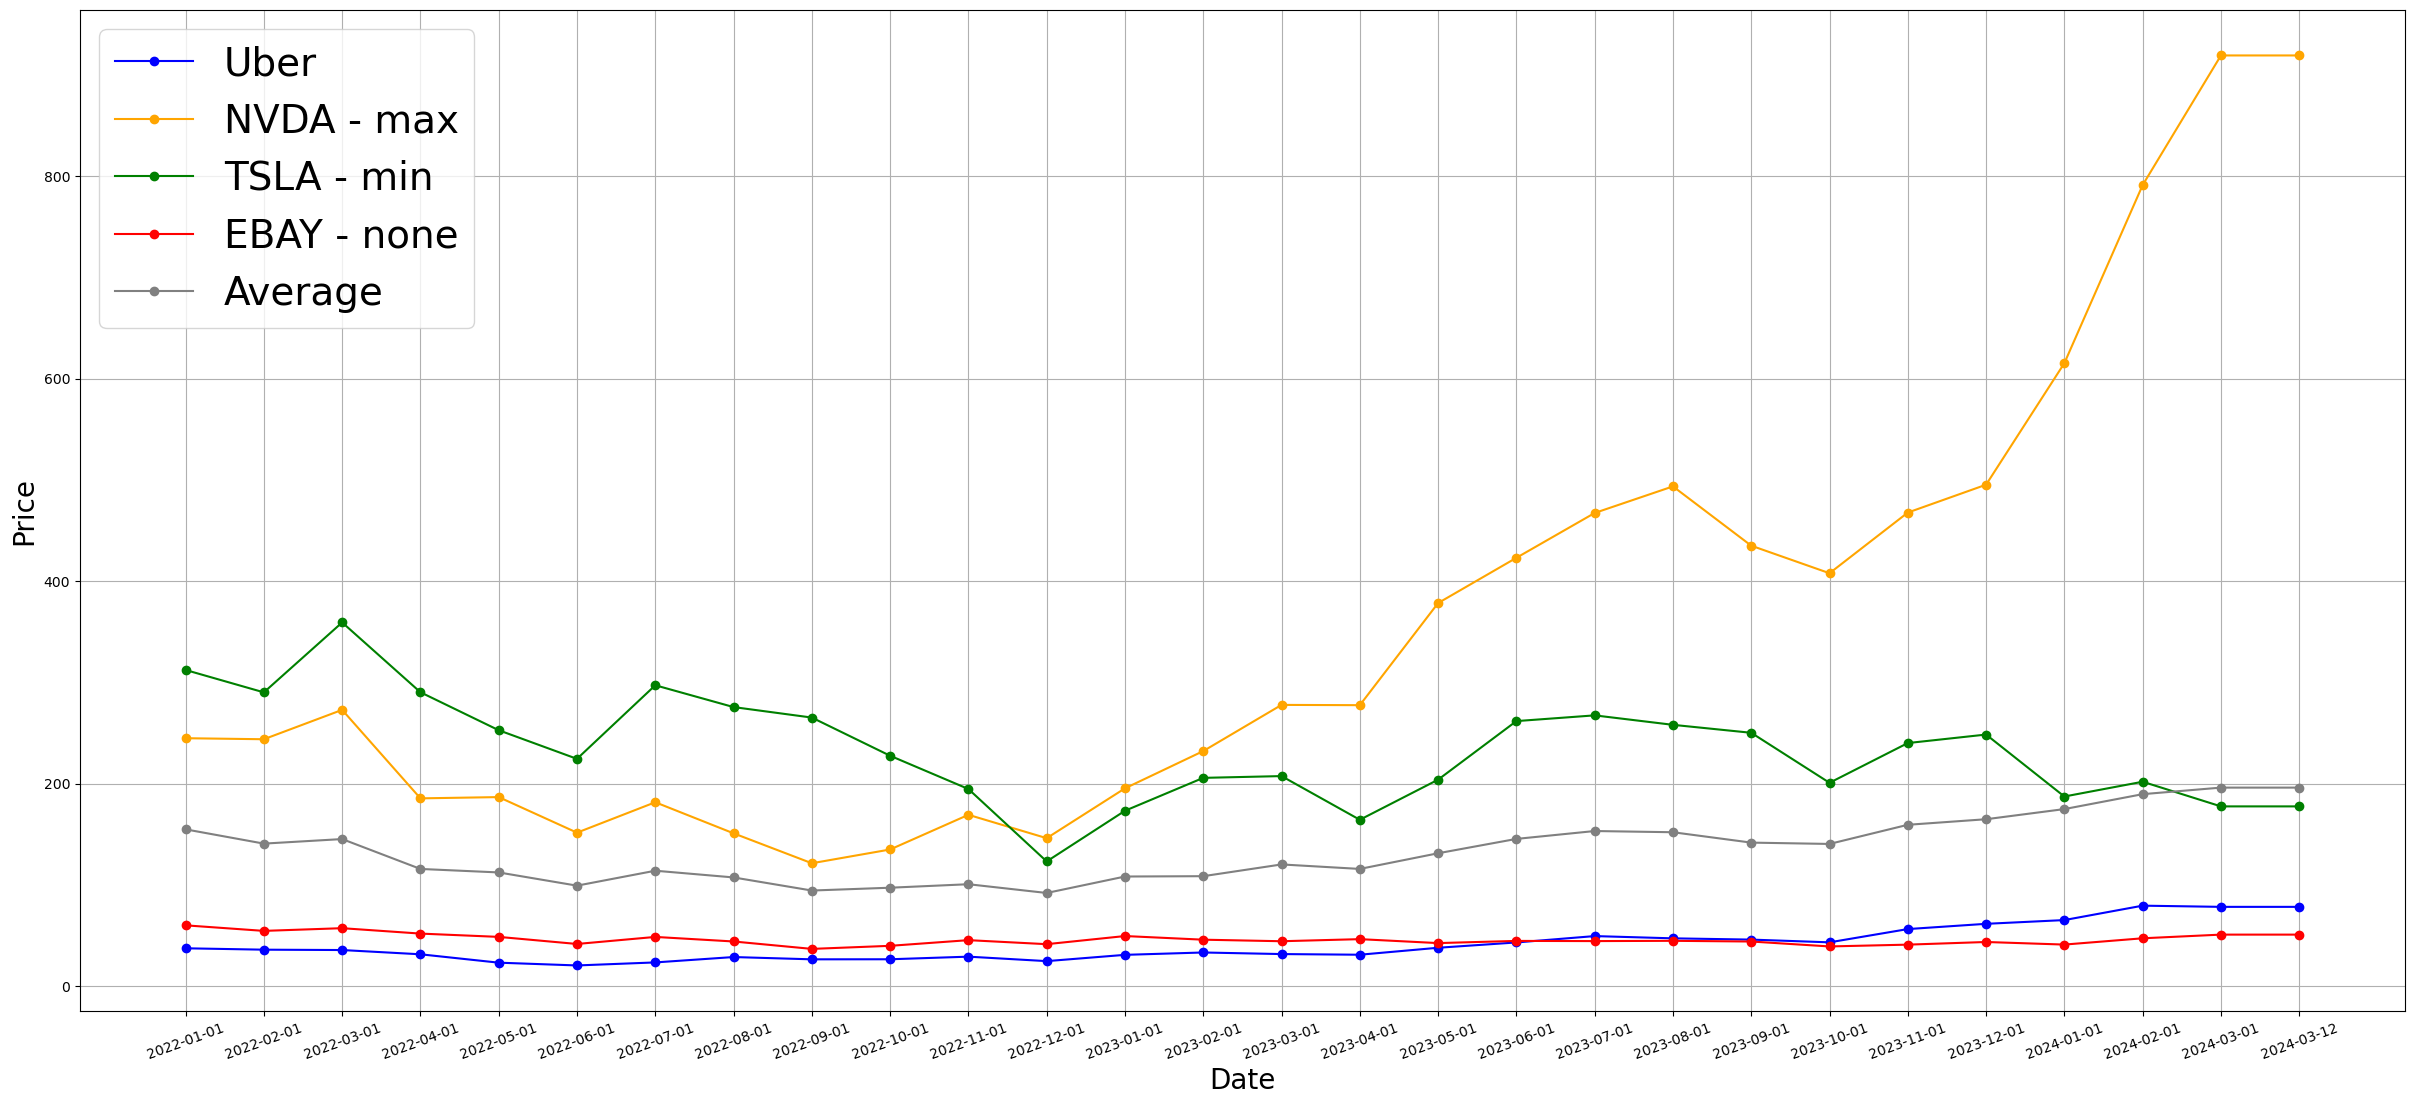

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(30, 13))

ax.plot(DF_COMPANIES['UBER'], marker="o", color='blue', label = 'Uber')
ax.plot(DF_COMPANIES[LST_COMP_CORR[0]], marker="o", color='orange', label = LST_COMP_CORR[0] + ' - max')
ax.plot(DF_COMPANIES[LST_COMP_CORR[1]], marker="o", color='green', label = LST_COMP_CORR[1] + ' - min')
ax.plot(DF_COMPANIES[LST_COMP_CORR[2]], marker="o", color='red', label = LST_COMP_CORR[2] + ' - none')
ax.plot(S_MEANS_COMP.index , S_MEANS_COMP, marker="o", color='gray', label = 'Average')

plt.xlabel('Date', fontsize=20)
plt.ylabel('Price', fontsize=20)
# Форматирование дат на оси X

# Поворот меток на оси X
plt.xticks(rotation=20)

plt.grid(True)
plt.legend(loc='upper left', fontsize=28)
plt.show()


На графике видно, что цены компании UBER повторяют росты/падения компании NVDA, аналогично наоборот с компанией TSLA. Также можно заметить, что среднее значение цен акций примерно повторяют рост/падение компании UBER

**Вывод**: приобрел опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python.